In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_parquet('../data/raw/final_taxi_data.parquet')
df.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,vendor_id,pickup_datetime,dropoff_datetime,payment_type,imp_surcharge
0,1,1.00,-73.962883,40.766521,1,N,-73.975868,40.763676,6.0,0.0,0.5,1.00,0.0,7.80,1,2015-08-26 06:35:08,2015-08-26 06:40:55,1,0.3
1,1,1.15,-74.006599,40.744186,1,N,-73.994347,40.754211,6.5,0.0,0.5,0.00,0.0,7.30,2,2015-08-22 17:25:04,2015-08-22 17:31:04,2,0.3
2,6,3.00,-73.989113,40.758263,1,N,-73.992310,40.725040,15.0,1.0,0.5,3.36,0.0,20.16,2,2015-08-25 17:07:03,2015-08-25 17:28:22,1,0.3
3,1,1.11,-73.994087,40.751228,1,N,-73.981529,40.758717,11.0,0.0,0.5,2.95,0.0,14.75,2,2015-08-03 11:32:22,2015-08-03 11:48:59,1,0.3
4,2,2.34,-73.982079,40.746006,1,N,-73.962326,40.774628,11.0,0.5,0.5,3.08,0.0,15.38,2,2015-08-07 21:33:16,2015-08-07 21:44:54,1,0.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100594 entries, 0 to 100937
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   passenger_count     100594 non-null  int8          
 1   trip_distance       100594 non-null  float32       
 2   pickup_longitude    100594 non-null  float64       
 3   pickup_latitude     100594 non-null  float64       
 4   ratecodeid          100594 non-null  int8          
 5   store_and_fwd_flag  100594 non-null  category      
 6   dropoff_longitude   100594 non-null  float64       
 7   dropoff_latitude    100594 non-null  float64       
 8   fare_amount         100594 non-null  float32       
 9   extra               100594 non-null  float32       
 10  mta_tax             100594 non-null  float32       
 11  tip_amount          100594 non-null  float32       
 12  tolls_amount        100594 non-null  float32       
 13  total_amount        100594 non-nul

In [12]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,ratecodeid,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,vendor_id,pickup_datetime,dropoff_datetime,payment_type,imp_surcharge
count,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594.000000,100594,100594,100594.000000,100594.000000
mean,1.695121,3.109172,-72.925411,40.171771,1.043323,-73.021807,40.226658,13.078897,0.320829,0.497395,1.664909,0.335058,16.197086,1.528849,2015-08-16 08:58:29.010160,2015-08-16 09:13:18.442004,1.394636,0.299714
min,0.000000,0.000000,-74.296989,0.000000,1.000000,-74.552559,0.000000,-80.000000,-1.000000,-0.500000,0.000000,0.000000,-80.300003,1.000000,2015-08-01 00:00:44,2015-08-01 00:05:09,1.000000,-0.300000
25%,1.000000,1.050000,-73.992393,40.734692,1.000000,-73.991562,40.733700,6.500000,0.000000,0.500000,0.000000,0.000000,8.750000,1.000000,2015-08-08 11:52:22,2015-08-08 12:07:27,1.000000,0.300000
50%,1.000000,1.800000,-73.982269,40.751766,1.000000,-73.980400,40.752460,9.500000,0.000000,0.500000,1.050000,0.000000,11.800000,2.000000,2015-08-16 03:10:56.500000,2015-08-16 03:21:16.500000,1.000000,0.300000
75%,2.000000,3.340000,-73.968094,40.765396,1.000000,-73.963013,40.766872,15.000000,0.500000,0.500000,2.250000,0.000000,17.799999,2.000000,2015-08-23 22:50:20.250000,2015-08-23 23:04:43.750000,2.000000,0.300000
max,6.000000,170.500000,0.000000,41.102951,99.000000,0.000000,41.497978,340.000000,1.500000,0.500000,266.000000,450.000000,450.309998,2.000000,2015-08-31 23:59:42,2015-09-01 00:31:53,4.000000,0.300000
std,1.341564,3.843871,8.741989,4.815621,0.426653,8.335245,4.590389,11.231456,0.362087,0.038528,2.632934,2.108463,13.731123,0.499170,NaN,NaN,0.504330,0.012474


# Generation distance and dt columns

In [22]:
df['trip_time_sec'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.seconds

In [29]:
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday + 1
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday + 1

In [32]:
(df['pickup_weekday'] != df['dropoff_weekday']).mean()

0.011611030478955007

In [35]:
df['weekend_trip'] = (df['pickup_weekday'] >= 5) | (df['dropoff_weekday'] >= 5)

In [38]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [40]:
(df['pickup_hour'] != df['dropoff_hour']).mean()

0.22552040877189494

In [46]:
from haversine import haversine, Unit
df['trip_haversine_km'] = df.apply(lambda x: haversine((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude']), unit=Unit.KILOMETERS), axis=1)
df['trip_haversine_miles'] = df.apply(lambda x: haversine((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude']), unit=Unit.MILES), axis=1)

In [48]:
def manhattan(start, end):
    return sum(abs(val1 - val2) for val1, val2 in zip(start, end))

In [50]:
df['trip_distance_manhattan'] = df.apply(lambda x: manhattan([x['pickup_latitude'], x['pickup_longitude']], [x['dropoff_latitude'], x['dropoff_longitude']]), axis=1)

# Exploring data

C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ixa4823\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='passenger_count', ylabel='passenger_count'>

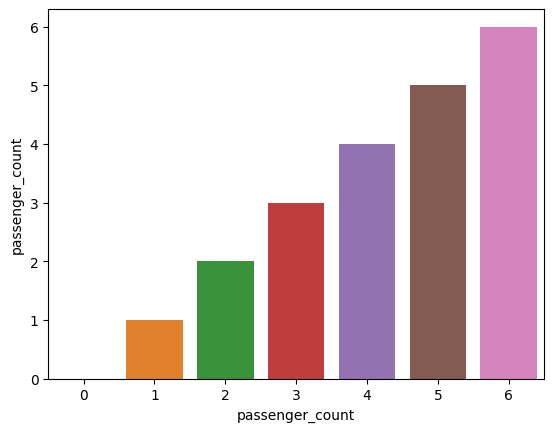

In [56]:
sns.barplot(data=df, x='passenger_count', y='passenger_count')

In [57]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.699843
2    0.142762
5    0.053969
3    0.045092
6    0.035728
4    0.022566
0    0.000040
Name: proportion, dtype: float64

# Datetime columns

In [8]:
df['pickup_datetime'].dt.year.value_counts()

pickup_datetime
2015    100594
Name: count, dtype: int64

In [10]:
df['pickup_datetime'].dt.month.value_counts()

pickup_datetime
8    100594
Name: count, dtype: int64

In [11]:
df['pickup_datetime'].dt.day.value_counts()

pickup_datetime
5     3627
1     3576
6     3558
13    3530
7     3473
20    3454
14    3434
15    3423
21    3416
28    3384
19    3375
12    3371
18    3327
27    3320
4     3304
11    3273
8     3271
22    3242
26    3242
29    3200
2     3190
3     3124
30    3090
17    3075
25    3047
16    2983
31    2900
9     2879
24    2846
23    2836
10    2824
Name: count, dtype: int64

In [13]:
df['pickup_datetime'].dt.hour.value_counts()

pickup_datetime
19    6127
18    6050
20    5993
21    5823
22    5648
17    5293
14    4998
23    4951
13    4950
12    4815
15    4814
9     4570
11    4472
10    4452
16    4363
8     4360
0     3982
7     3458
1     2983
2     2295
6     2165
3     1697
5     1177
4     1158
Name: count, dtype: int64